## Neural Network classification with PyTorch

Classification is a problem of precting whether something is one thing or another (there can be multiple things as the options)

## 1. Get classification data and get it ready

In [279]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import pandas as pd

# Make 1000 samples

n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [280]:
# First 5 samples of X and y:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [281]:
# Creata a pandas DataFrame

circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label":y})
circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


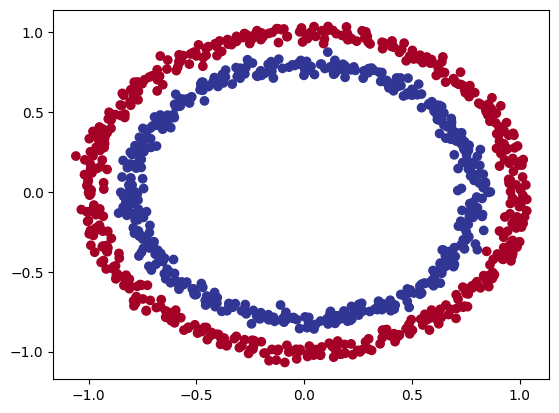

In [282]:
# Visualise the data
plt.scatter(x=X[:, 0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

### 1.1 Check input and ouput shapes

In [283]:
X.shape, y.shape

((1000, 2), (1000,))

In [284]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
X_sample, y_sample, X_sample.shape, y_sample.shape

(array([0.75424625, 0.23148074]), 1, (2,), ())

### 1.2 Turn data into tensors and split it into train and test sets

In [285]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [286]:
X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [287]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [288]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

## 2. Building a model

Let's build a model to classify the blue and red dots.

To do so, we want to:

1. Set up device independent code
2. Construct a model (by inheriting from nn.Module)
3. Define a loss function and optimizer
4. Create a training and test loop


In [289]:
# Device independent code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Now it is time to build a model with these steps:

1. Subclass `nn.Module`
2. Create 2 `nn.Linear()` layers that are capable of handling the shape of the data
3. Define a `forward()` method that outlines the forward pass of the model
4. Instantiate an instance of the model and send it to the target device

In [290]:
# 1. Create a class that subclasses nn.Module

class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear() layers
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # Takes in 2 features and upscales to 5 numbers
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # Takes in 5 features from layer 1 and returns 1 feature

  # 3. Define a forward method that outlines the forward pass of the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer2(self.layer1(x)) # x -> layer 1 -> layer 2

  # 4. Instantiate an instance of the model class and send it to the target device

model_0 = CircleModel().to(device)
model_0, model_0.state_dict()

(CircleModel(
   (layer_1): Linear(in_features=2, out_features=5, bias=True)
   (layer_2): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('layer_1.weight',
               tensor([[-0.2176, -0.4861],
                       [-0.3808,  0.1774],
                       [-0.0126,  0.2618],
                       [-0.2150,  0.1812],
                       [-0.2912, -0.3866]], device='cuda:0')),
              ('layer_1.bias',
               tensor([-0.4247, -0.0391,  0.2252, -0.2959, -0.2400], device='cuda:0')),
              ('layer_2.weight',
               tensor([[ 0.1641,  0.0906,  0.3954, -0.2444,  0.3281]], device='cuda:0')),
              ('layer_2.bias', tensor([0.3318], device='cuda:0'))]))

In [291]:
# We can use nn.Sequential to replicate the model above

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=32),
    nn.Linear(in_features=32, out_features=1)
).to(device)

model_0, model_0.state_dict()

(Sequential(
   (0): Linear(in_features=2, out_features=32, bias=True)
   (1): ReLU()
   (2): Linear(in_features=32, out_features=32, bias=True)
   (3): ReLU()
   (4): Linear(in_features=32, out_features=1, bias=True)
 ),
 OrderedDict([('0.weight',
               tensor([[ 0.6373,  0.0214],
                       [ 0.4447,  0.0322],
                       [-0.6455,  0.0365],
                       [-0.4318,  0.3928],
                       [-0.0185, -0.4142],
                       [-0.0119, -0.6913],
                       [-0.4072, -0.6013],
                       [ 0.5960, -0.6098],
                       [-0.4987, -0.2713],
                       [ 0.4871, -0.6273],
                       [ 0.6255,  0.1537],
                       [ 0.6819, -0.4944],
                       [ 0.6686,  0.2511],
                       [-0.6386,  0.2719],
                       [-0.6343,  0.0890],
                       [ 0.5183, -0.3355],
                       [-0.6026,  0.1252],
                    

In [292]:
model_0.eval()
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
untrained_preds[:10], y_test[:10]

(tensor([[ 0.0530],
         [ 0.0134],
         [ 0.1005],
         [ 0.0222],
         [ 0.1139],
         [ 0.1012],
         [-0.0062],
         [ 0.0111],
         [ 0.0975],
         [ 0.0114]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

For classfication type problems, common loss functions are either binary cross entropy or categorical cross entropy (cross entropy).

For optimizers, the two most common ones are SGD and Adam, but PyTorch has many other built in options.

* For the loss function we'll use the `nn.BCEWithLogitsLoss()`

In [293]:
# loss_fn = nn.BCELoss() # BCELoss - required inputs to have gone through the sigmoid activation function
loss_fn = nn.BCEWithLogitsLoss() # This is the binary cross entropy function with the sigmoid activation function built in - more numerically stable

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [294]:
# Calculate the accuracy - out of 100 examples, what percentage does the model get right?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true.to(device), y_pred.to(device)).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train the model

To train the model we need to build a training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Perform backpropagation
5. Step the optimizer

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model are going to be raw **logits**

We can convert these **logits** by passing them to the some kind of activation function (e.g sigmoid for binary classification, softmax for multiclass classification)

Then we can convert the model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [295]:
# View the first 5 outputs of the forward pass on the test data
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.0530],
        [0.0134],
        [0.1005],
        [0.0222],
        [0.1139]], device='cuda:0')

In [296]:
y_test

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])

In [297]:
# Use the sigmoid activation function on the model logits to turn them into prediction probabilities

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5132],
        [0.5034],
        [0.5251],
        [0.5056],
        [0.5284]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1`
* `y_pred_probs` < 0.5, `y=0`

In [298]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)
y_preds

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

### 3.2 Build a training and testing loop

In [299]:
# Set the number of epochs

epochs = 1000

# Put the data to the target device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build a training and evaluation loop

for epoch in range(epochs):

  # Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits into prediction labels into prediction values]

  # 2. Calculate the loss and accuracy
  loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects logits to be passed as the predicted value input
  acc = accuracy_fn(y_true=y_train, y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing

  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

    # 3. Print out information
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Train loss: {loss} | Train accuracy: {acc}\nTest loss: {test_loss} | Test accuracy: {test_acc}")


Epoch: 0 | Train loss: 0.6948878169059753 | Train accuracy: 56.00000000000001
Test loss: 0.6926246285438538 | Test accuracy: 56.49999999999999
Epoch: 1000 | Train loss: 0.07533158361911774 | Train accuracy: 100.0
Test loss: 0.10881759226322174 | Test accuracy: 100.0
Epoch: 2000 | Train loss: 0.010498381219804287 | Train accuracy: 100.0
Test loss: 0.02475222386419773 | Test accuracy: 100.0
Epoch: 3000 | Train loss: 0.005236296448856592 | Train accuracy: 100.0
Test loss: 0.01490062940865755 | Test accuracy: 100.0
Epoch: 4000 | Train loss: 0.0034356911201030016 | Train accuracy: 100.0
Test loss: 0.010953432880342007 | Test accuracy: 100.0
Epoch: 5000 | Train loss: 0.0025198792573064566 | Train accuracy: 100.0
Test loss: 0.008784315548837185 | Test accuracy: 100.0
Epoch: 6000 | Train loss: 0.001991422614082694 | Train accuracy: 100.0
Test loss: 0.0074023958295583725 | Test accuracy: 100.0
Epoch: 7000 | Train loss: 0.001642603543587029 | Train accuracy: 100.0
Test loss: 0.006445670034736395

## 4. Make predictions and evaluate the model

From the metrics it looks like the model isn't doing doing very well

So to inspect it we can make some predictions and plot them on a graph

To do so, we're going to import a function called `plot_decision_boundary()`

In [300]:
import requests
from pathlib import Path

# Download helper functions from the learn pytorch repo (if it's not already downloaded)

if Path("helper_functions.py").is_file():
  print("helper_function.py already exists")
else:
  print("downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


helper_function.py already exists


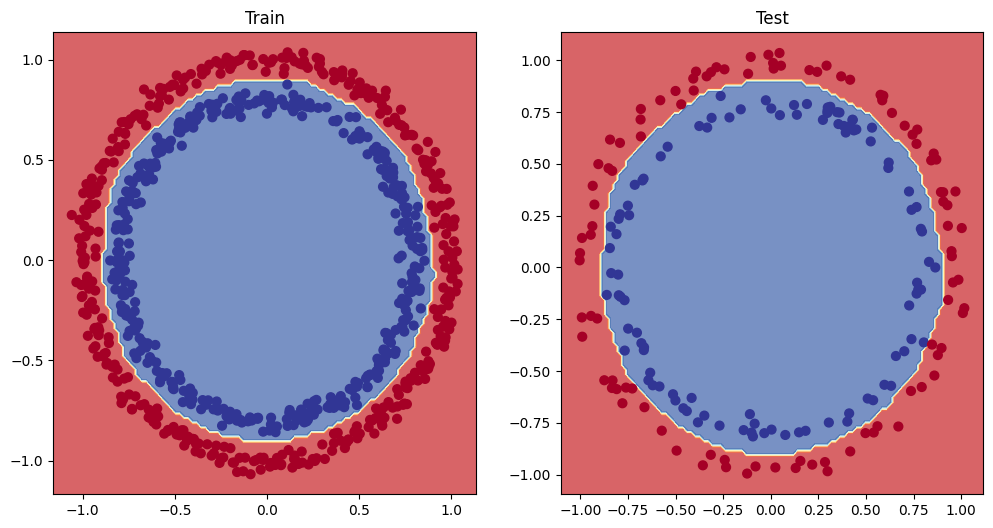

In [301]:
from helper_functions import plot_predictions, plot_decision_boundary
# Plot decision boundary of the model

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about the patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation function
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they all deal directly with the model, rather than the data.

And because these options are all values we can change they are referred to as **hyperparameters**.

Let's try to improve the model by:
* Adding more hidden units
* Increase the number of layers
* Increase the number of epochs

In [303]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    l = self.layer1(x)
    l = self.layer2(l)
    l = self.layer3(l)
    return l

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)